<a href="https://colab.research.google.com/github/pq2312/Which-plants-are-better-for-bees-native-or-non-native/blob/main/Plants_for_bee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**I. EXECUTIVE SUMMARY** 

Which plants are better for bees: native or non-native?

You work for the local government environment agency and have taken on a project about creating pollinator bee-friendly spaces. You can use both native and non-native plants to create these spaces and therefore need to ensure that you use the correct plants to optimize the environment for these bees.

The team has collected data on native and non-native plants and their effects on pollinator bees. Your task will be to analyze this data and provide recommendations on which plants create an optimized environment for pollinator bees.

Provide your agency with a report that covers the following:
* Which plants are preferred by native vs non-native bee species?
* A visualization of the distribution of bee and plant species across one of the samples.
* Select the top three plant species you would recommend to the agency to support native bees.

Data source: [DRYAD](https://datadryad.org/stash/dataset/doi%253A10.5061%252Fdryad.pzgmsbcj8) and [Datacamp](https://app.datacamp.com/workspace/w/6ce8f6c1-ec79-4c8f-b6bb-38e29b381386/edit)

**II. ANALYSIS**

In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
ls /content/gdrive/MyDrive/Python-Practice/Bee

plants_and_bees.csv


In [4]:
# Reading in the data
plants_bee = pd.read_csv('/content/gdrive/MyDrive/Python-Practice/Bee/plants_and_bees.csv')


In [5]:
# Display summary for the data
plants_bee.head()

,sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0


In [6]:
plants_bee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sample_id       1250 non-null   int64  
 1   species_num     1250 non-null   int64  
 2   date            1250 non-null   object 
 3   season          1250 non-null   object 
 4   site            1250 non-null   object 
 5   native_or_non   1250 non-null   object 
 6   sampling        1250 non-null   object 
 7   plant_species   1250 non-null   object 
 8   time            1250 non-null   int64  
 9   bee_species     1250 non-null   object 
 10  sex             1250 non-null   object 
 11  specialized_on  7 non-null      object 
 12  parasitic       1187 non-null   float64
 13  nesting         1196 non-null   object 
 14  status          15 non-null     object 
 15  nonnative_bee   1189 non-null   float64
dtypes: float64(2), int64(3), object(11)
memory usage: 156.4+ KB


**1. Which plants are preferred by native vs non-native bee species**

In [10]:
# group data by bee and plant types
bee_group = plants_bee.groupby(['nonnative_bee','native_or_non']).size().reset_index(name = 'count')
print(bee_group)

   nonnative_bee native_or_non  count
0            0.0        native    561
1            0.0    non-native    593
2            1.0        native     19
3            1.0    non-native     16


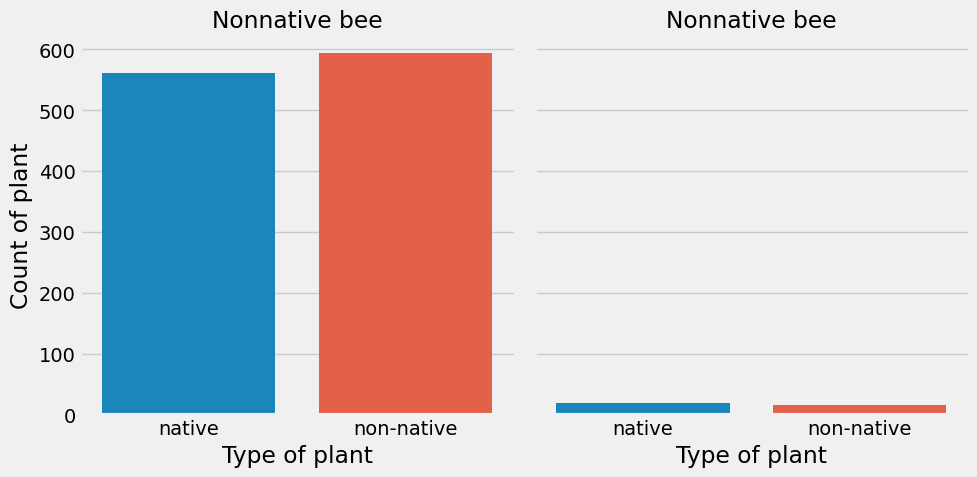

In [11]:
# visualisation the summary
a = sns.catplot(col = 'nonnative_bee', kind ='count', x = 'native_or_non',data = plants_bee);
a.set(xlabel = "Type of plant", ylabel = "Count of plant");
a.set_titles("Nonnative bee", "Native bee");

Non-native bee prefers non-native plants. Native bee prefers native plants.

**2. A visualization of the distribution of bee and plant species across one of the samples**

In [29]:
import random
list = plants_bee['sample_id']
random.choice(list)

17443

In [30]:
sample = plants_bee[plants_bee['sample_id'] == random.choice(list)]

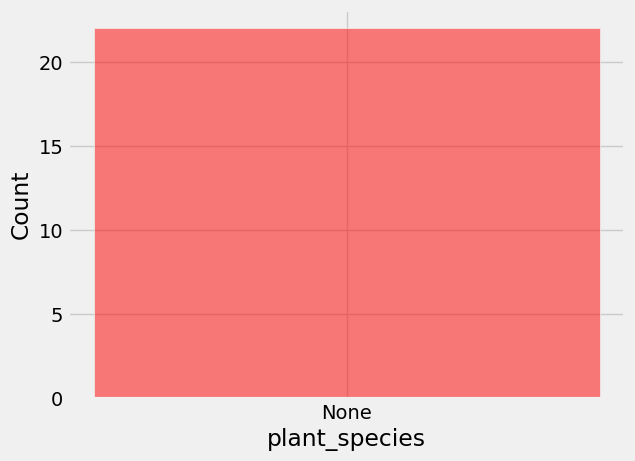

In [35]:
sns.histplot(sample['plant_species'], bins = 10, kde = True, color='r');

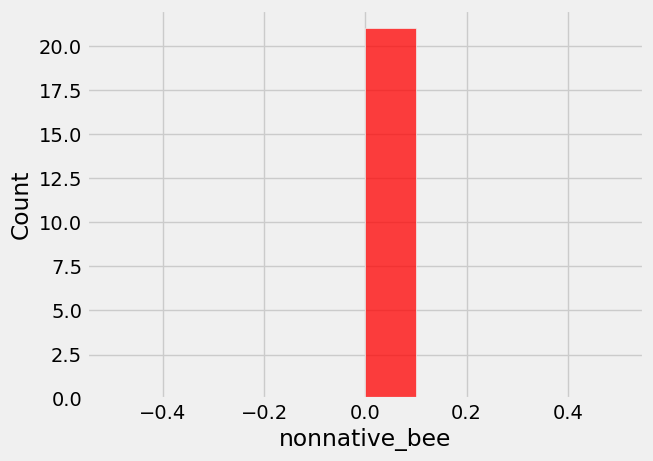

In [34]:
sns.histplot(sample['nonnative_bee'],bins = 10, color='r');

**3. Select the top three plant species you would recommend to the agency to support native bees**




In [12]:
# extract data of native bee
native_bee = plants_bee[plants_bee['nonnative_bee'] == 1]
native_bee.head()

,sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
5,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Apis mellifera,f,NaN,0.0,hive,NaN,1.0
6,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Apis mellifera,f,NaN,0.0,hive,NaN,1.0
7,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Apis mellifera,f,NaN,0.0,hive,NaN,1.0
8,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Apis mellifera,f,NaN,0.0,hive,NaN,1.0
9,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Apis mellifera,f,NaN,0.0,hive,NaN,1.0


In [14]:
# group by plant species
native_bee.groupby('plant_species').size().sort_values(ascending=False)

plant_species
None                    33
Daucus carota            1
Trifolium incarnatum     1
dtype: int64

Recommended plants: Daucus carota and Trifolium incarnatum.